In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from pandas import Series,DataFrame
import seaborn as sns 

In [2]:
#https://www.kaggle.com/residentmario/bivariate-plotting-with-pandas/data
reviews = pd.read_csv("winemag-data_first150k.csv", index_col=0)
reviews.head()

,country,description,designation,points,price,province,region_1,region_2,variety,winery
0,US,This tremendous 100% varietal wine hails from ...,Martha's Vineyard,96,235.0,California,Napa Valley,Napa,Cabernet Sauvignon,Heitz
1,Spain,"Ripe aromas of fig, blackberry and cassis are ...",Carodorum Selección Especial Reserva,96,110.0,Northern Spain,Toro,NaN,Tinta de Toro,Bodega Carmen Rodríguez
2,US,Mac Watson honors the memory of a wine once ma...,Special Selected Late Harvest,96,90.0,California,Knights Valley,Sonoma,Sauvignon Blanc,Macauley
3,US,"This spent 20 months in 30% new French oak, an...",Reserve,96,65.0,Oregon,Willamette Valley,Willamette Valley,Pinot Noir,Ponzi
4,France,"This is the top wine from La Bégude, named aft...",La Brûlade,95,66.0,Provence,Bandol,NaN,Provence red blend,Domaine de la Bégude


### sns.countplot()	sns.kdeplot()	核密度估计 sns.jointplot()	sns.boxplot()  sns.violinplot()

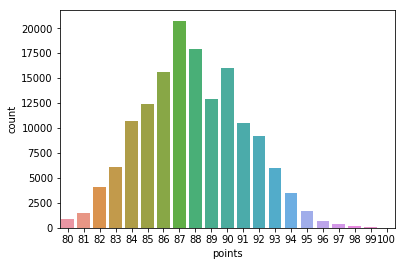

In [4]:
sns.countplot(reviews['points'])
#reviews['points'].value_counts().sort_index().plot.bar()
plt.show()

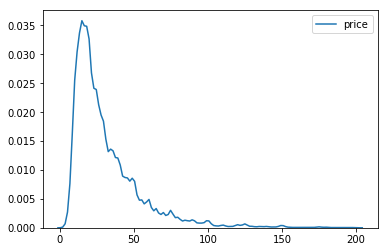

In [5]:
sns.kdeplot(reviews.query('price < 200').price)
#reviews[reviews['price'] < 200]['price'].value_counts().sort_index().plot.line()
plt.show()

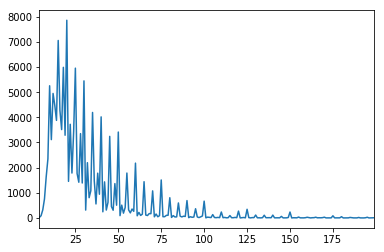

In [6]:
# 出现锯齿状
reviews[reviews['price'] < 200]['price'].value_counts().sort_index().plot.line()
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:630: UserWarning: Passing a 2D dataset for a bivariate plot is deprecated in favor of kdeplot(x, y), and it will cause an error in future versions. Please update your code.
  warnings.warn(warn_msg, UserWarning)


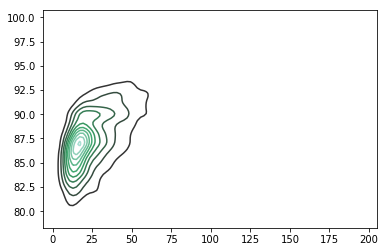

In [7]:
#两个类别的关系
sns.kdeplot(reviews[reviews['price'] < 200].loc[:, ['price', 'points']].dropna().sample(5000))
plt.show()

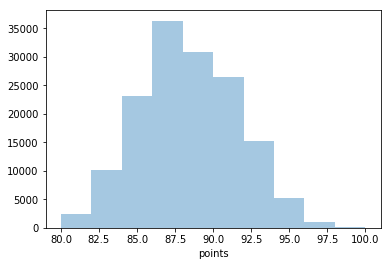

In [8]:
sns.distplot(reviews['points'], bins=10, kde=False)
#reviews[reviews['price'] < 200]['price'].plot.hist() 对应直方图
plt.show()

### jointplot   对应  kind=scatter/reg/hex/kde

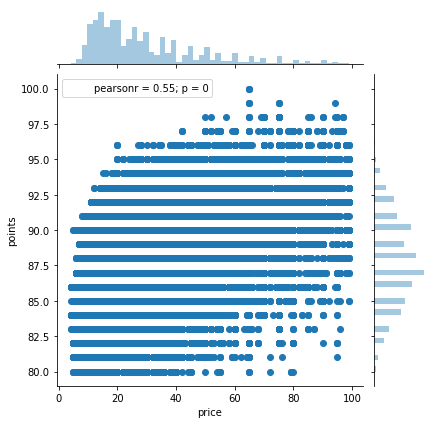

In [12]:
sns.jointplot(x='price', y='points', data=reviews[reviews['price'] < 100])
plt.show()

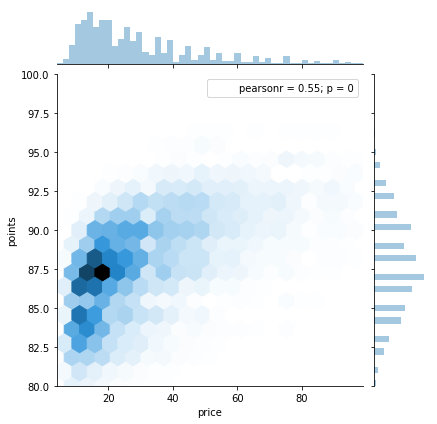

In [10]:
sns.jointplot(x='price', y='points', data=reviews[reviews['price'] < 100], kind='hex', 
              gridsize=20)
plt.show()

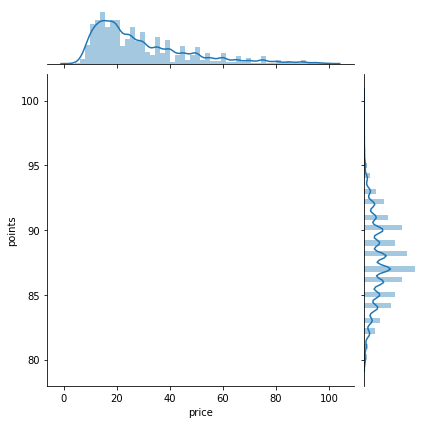

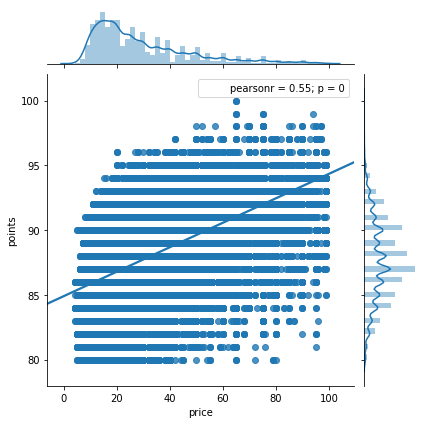

In [15]:
sns.jointplot(x='price', y='points', data=reviews[reviews['price'] < 100], kind='reg')
plt.show()

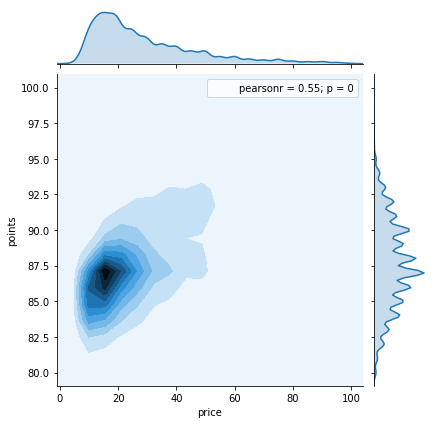

In [16]:
sns.jointplot(x='price', y='points', data=reviews[reviews['price'] < 100], kind='kde', 
              gridsize=20)
plt.show()

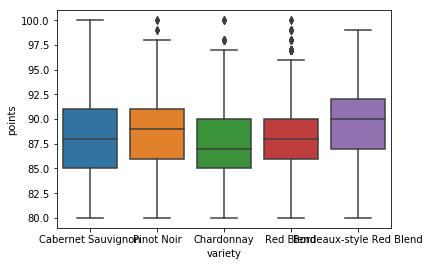

In [19]:
df = reviews[reviews.variety.isin(reviews.variety.value_counts().head(5).index)]
sns.boxplot(x='variety', y='points', data=df)
plt.show()

#### Red Blend 比Chardonnay variety得分更高一点

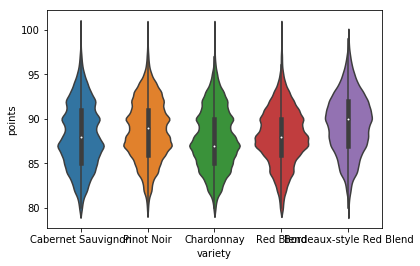

In [20]:

sns.violinplot( x='variety',y='points',data=reviews[reviews.variety.isin(reviews.variety.value_counts()[:5].index)])
plt.show()